**Project Idea:** Energy Consumption Analysis in Smart Homes
- **Objective:** Analyze energy usage data from smart home devices to identify patterns, peak usage times, and potential for energy savings.
- **Skills Demonstrated:** Data mining, time series analysis, predictive modeling, anomaly detection, and data visualization.
- **Dataset Link:** [UCI Machine Learning Repository - Appliances Energy Prediction Data Set](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction)

#### Dataset Information

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

For more information about the house, data collection, R scripts and figures, please refer to the paper and to the following github repository:

https://github.com/LuisM78/Appliances-energy-prediction-data

#### Variable Information
- date time year-month-day hour:minute:second 
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chievres weather station), in Celsius
- Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C
- rv1, Random variable 1, nondimensional
- rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

## Importing Libraries

In [1]:
import pandas as pd

## Importing Data

In [2]:
# Load the dataset
file_path = 'energydata_complete.csv'
data = pd.read_csv(file_path)

In [4]:
# Display the first few rows of the dataset for initial inspection
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## Data Cleaning and Feature Engineering

In [5]:
# Step 1: Converting the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

In [6]:
# Step 2: Checking for missing values
missing_values = data.isnull().sum()

In [7]:
# Step 3: Inspecting data types
data_types = data.dtypes

In [8]:
# Step 4: Examining statistical summaries
statistical_summary = data.describe()

missing_values

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [9]:
data_types

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object

In [10]:
statistical_summary

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,2016-03-20 05:30:00,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
min,2016-01-11 17:00:00,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,2016-02-14 23:15:00,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,2016-03-20 05:30:00,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,2016-04-23 11:45:00,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,2016-05-27 18:00:00,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634


The dataset has been successfully loaded. Here's a brief overview of the first few rows:

- The dataset includes various parameters such as energy use of appliances, lights, temperature and humidity in different areas of the house, external temperature and weather conditions, and two random variables (rv1 and rv2).
- The `date` column contains timestamps, which will likely need conversion to a datetime format for easier analysis.


The initial inspection of the dataset reveals the following:

1. **Missing Values**: There are no missing values in any of the columns.

2. **Data Types**: The `date` column has been successfully converted to datetime format. The other columns are mostly floats, which is appropriate for the temperature, humidity, and energy use measurements. The `Appliances` and `lights` columns are integers, representing energy use in Wh.

3. **Statistical Summary**: The statistical summary provides insights such as the mean, standard deviation, minimum, and maximum values for each variable. This is useful for identifying potential outliers and understanding the distribution of the data.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

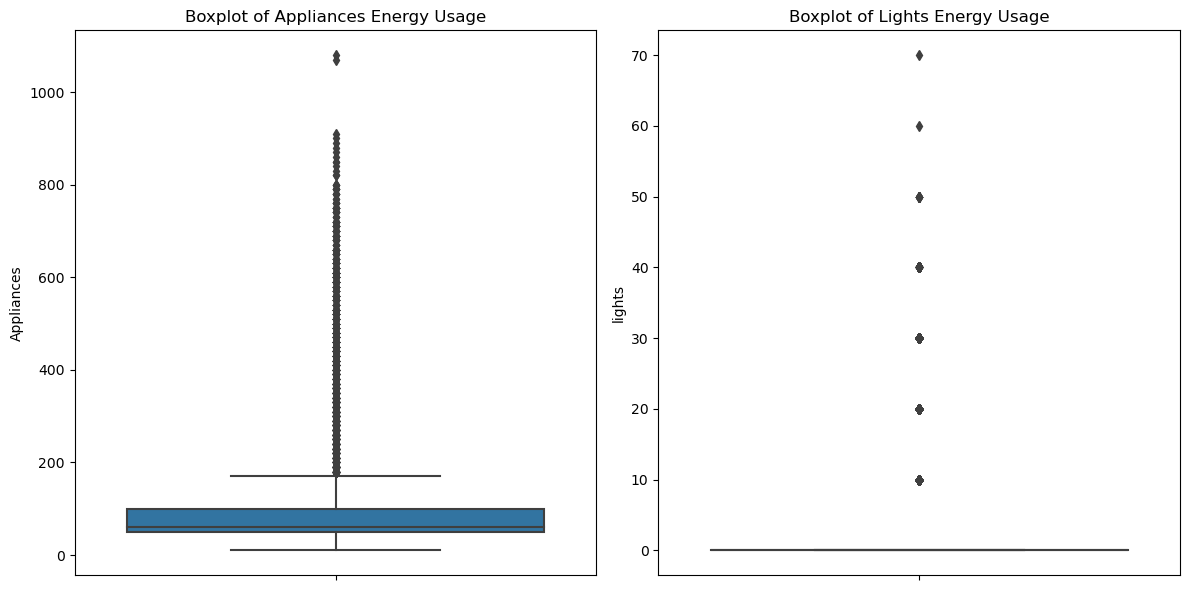

In [12]:
# Outlier Detection: Using boxplots to visualize potential outliers in 'Appliances' and 'lights'
plt.figure(figsize=(12, 6))

# Plot for 'Appliances' energy usage
plt.subplot(1, 2, 1)
sns.boxplot(y=data['Appliances'])
plt.title('Boxplot of Appliances Energy Usage')

# Plot for 'lights' energy usage
plt.subplot(1, 2, 2)
sns.boxplot(y=data['lights'])
plt.title('Boxplot of Lights Energy Usage')

plt.tight_layout()
plt.show()

In [13]:
# Checking the distribution of the 'Appliances' and 'lights' columns
appliance_dist = data['Appliances'].describe()
lights_dist = data['lights'].describe()

appliance_dist

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64

In [14]:
lights_dist

count    19735.000000
mean         3.801875
std          7.935988
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         70.000000
Name: lights, dtype: float64

The boxplots and distribution summaries for the 'Appliances' and 'lights' energy usage reveal some interesting points:

1. **'Appliances' Energy Usage**:
   - There are several outliers, with values significantly higher than the median (60 Wh). The maximum value reaches up to 1080 Wh.
   - The mean is around 97.69 Wh, but the standard deviation is quite high at 102.52 Wh, indicating a wide spread of values.

2. **'Lights' Energy Usage**:
   - The majority of the values are concentrated at the lower end (many values are 0, indicating periods when lights were off).
   - There are outliers as well, with a maximum value of 70 Wh.

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
# Dropping unnecessary columns (rv1 and rv2)
data_cleaned = data.drop(['rv1', 'rv2'], axis=1)

In [17]:
# Feature Engineering: Extracting features from 'date' column
data_cleaned['month'] = data_cleaned['date'].dt.month
data_cleaned['day'] = data_cleaned['date'].dt.day
data_cleaned['hour'] = data_cleaned['date'].dt.hour
data_cleaned['minute'] = data_cleaned['date'].dt.minute
data_cleaned['day_of_week'] = data_cleaned['date'].dt.dayofweek

In [18]:
# Handling Outliers: Capping the 'Appliances' and 'lights' at their 95th percentile
cap_appliances = data_cleaned['Appliances'].quantile(0.95)
cap_lights = data_cleaned['lights'].quantile(0.95)
data_cleaned['Appliances'] = data_cleaned['Appliances'].clip(upper=cap_appliances)
data_cleaned['lights'] = data_cleaned['lights'].clip(upper=cap_lights)

In [19]:
# Normalization/Standardization
# Excluding 'date' column from scaling
columns_to_scale = data_cleaned.columns.drop('date')
scaler = StandardScaler()
data_cleaned[columns_to_scale] = scaler.fit_transform(data_cleaned[columns_to_scale])

In [20]:
# Showing the first few rows of the cleaned and transformed dataset
data_cleaned.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,month,day,hour,minute,day_of_week
0,2016-01-11 17:00:00,-0.412037,2.456934,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,-0.908217,...,-2.976328,0.82208,1.207694,2.091596,0.366975,-1.569369,-0.598455,0.794304,-1.463734,-1.499445
1,2016-01-11 17:10:00,-0.412037,2.456934,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,-0.908217,...,-2.962813,0.82208,1.071703,1.766584,0.343135,-1.569369,-0.598455,0.794304,-0.878210,-1.499445
2,2016-01-11 17:20:00,-0.544879,2.456934,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,-0.944115,...,-2.949298,0.82208,0.935713,1.441572,0.319294,-1.569369,-0.598455,0.794304,-0.292687,-1.499445
3,2016-01-11 17:30:00,-0.544879,2.456934,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,-0.962063,...,-2.935783,0.82208,0.799723,1.116559,0.295454,-1.569369,-0.598455,0.794304,0.292836,-1.499445
4,2016-01-11 17:40:00,-0.412037,2.456934,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,-0.962063,...,-2.922268,0.82208,0.663733,0.791547,0.271613,-1.569369,-0.598455,0.794304,0.878359,-1.499445


The data cleaning and transformation process has been completed with the following steps:

1. **Dropping Unnecessary Columns**: The random variables `rv1` and `rv2` were removed.

2. **Feature Engineering**: New features were extracted from the `date` column, including month, day, hour, minute, and day of the week.

3. **Handling Outliers**: Outliers in the `Appliances` and `lights` columns were capped at their 95th percentile values to minimize the impact of extreme values.

4. **Normalization/Standardization**: The data, excluding the `date` column, was standardized using `StandardScaler` from scikit-learn. This step is important for machine learning algorithms that are sensitive to the scale of the data.

## EDA

Great! Let's start with Exploratory Data Analysis (EDA) to uncover trends, patterns, and relationships in the dataset. This step is crucial before we dive into machine learning modeling. Here are the EDA steps we'll undertake:

1. **Time Series Analysis**: Examine how energy usage (both appliances and lights) varies over time.

2. **Correlation Analysis**: Check the correlation between different variables, especially how various temperatures and humidity levels relate to energy consumption.

3. **Distribution of Variables**: Look at the distributions of key variables to understand their spread and central tendencies.

4. **Comparison of Energy Usage**: Compare the energy usage across different times of the day and days of the week to spot any usage patterns.

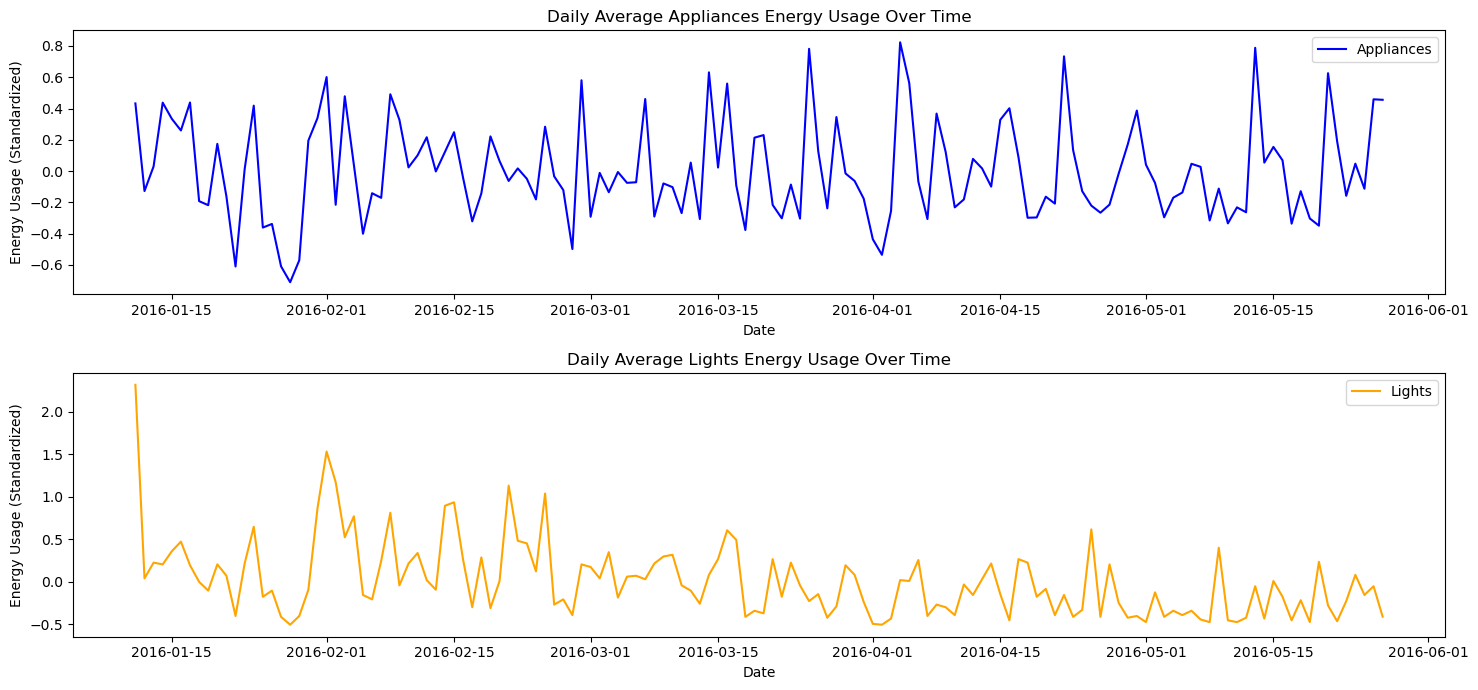

In [21]:
# Time Series Analysis: Plotting energy consumption over time

# Since the data is large, we'll resample it by day for clearer visualization
data_resampled = data_cleaned.resample('D', on='date').mean()

plt.figure(figsize=(15, 7))

# Appliances Energy Usage over Time
plt.subplot(2, 1, 1)
plt.plot(data_resampled.index, data_resampled['Appliances'], label='Appliances', color='blue')
plt.title('Daily Average Appliances Energy Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Usage (Standardized)')
plt.legend()

# Lights Energy Usage over Time
plt.subplot(2, 1, 2)
plt.plot(data_resampled.index, data_resampled['lights'], label='Lights', color='orange')
plt.title('Daily Average Lights Energy Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Usage (Standardized)')
plt.legend()

plt.tight_layout()
plt.show()

The time series plots provide insights into the daily average energy usage patterns for both appliances and lights over the duration of the dataset:

1. **Appliances Energy Usage**: Shows variability over time with some peaks and troughs. It would be interesting to investigate what causes these fluctuations—whether they are related to specific days of the week, weather conditions, or other factors.

2. **Lights Energy Usage**: This also shows variability, but it's important to note that the lights' energy usage is generally lower than that of appliances, and the pattern seems somewhat different from that of the appliances.

Next, we'll perform a correlation analysis to examine the relationships between different variables, especially focusing on how temperature and humidity in different parts of the house correlate with energy usage. This will help identify which factors are most strongly associated with higher energy consumption.

In [22]:
# Correlation Analysis
correlation_matrix = data_cleaned.corr()

In [23]:
# Focusing on the correlation of different features with 'Appliances' and 'lights' energy usage
correlation_with_energy = correlation_matrix[['Appliances', 'lights']].sort_values(by='Appliances', ascending=False)

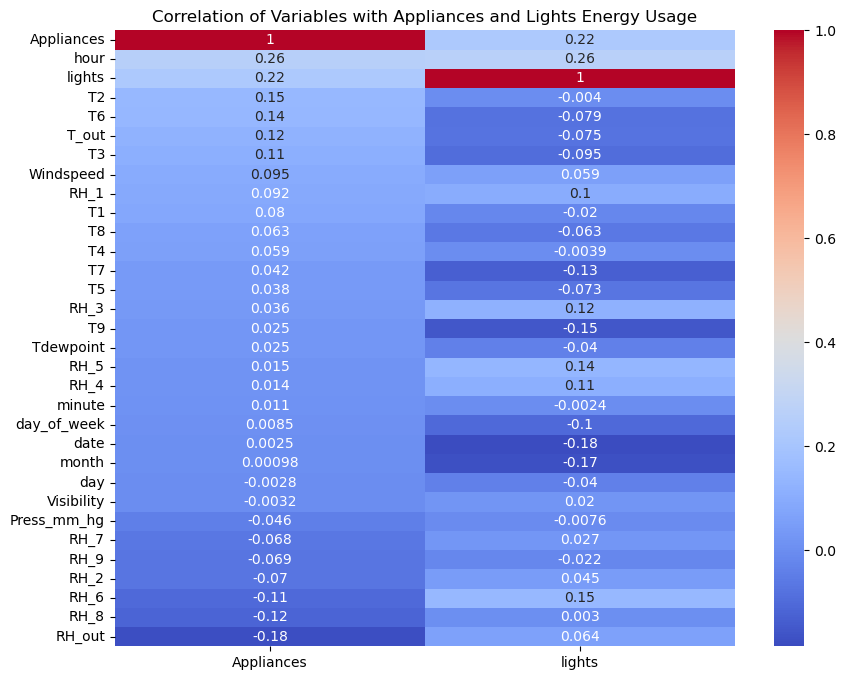

In [24]:
# Displaying the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_energy, annot=True, cmap='coolwarm')
plt.title('Correlation of Variables with Appliances and Lights Energy Usage')
plt.show()

In [25]:
correlation_with_energy

,Appliances,lights
Appliances,1.000000,0.220518
hour,0.259094,0.264292
lights,0.220518,1.000000
T2,0.147589,-0.004007
T6,0.142726,-0.078891
T_out,0.122340,-0.074515
T3,0.108071,-0.095329
Windspeed,0.095311,0.058708
RH_1,0.092142,0.100282
T1,0.079936,-0.020442


The correlation analysis reveals the following insights:

1. **Correlation with Appliances Energy Usage**:
   - The `hour` of the day shows a notable positive correlation with appliances energy usage, indicating time-of-day effects.
   - Temperatures in different areas (`T2`, `T6`, `T_out`, `T3`) show positive correlations, suggesting that higher temperatures are associated with increased energy usage.
   - Humidity levels (`RH_1`, `RH_3`) also show a slight positive correlation.
   - `RH_out` (outside humidity) has a notable negative correlation, which is an interesting aspect to explore further.

2. **Correlation with Lights Energy Usage**:
   - The `hour` of the day is also positively correlated with lights energy usage, which is expected as lighting needs vary throughout the day.
   - `RH_5` and `RH_4` show some positive correlation, indicating a relationship between certain humidity conditions and the use of lights.
   - There's a negative correlation with `T9`, `month`, `RH_7`, and `RH_9`, suggesting that lights usage decreases with higher temperatures in some areas or during certain months.

Next, we can look at the distribution of key variables and compare energy usage across different times of the day and days of the week. This will help us further understand usage patterns and identify potential opportunities for energy savings. Let's start by visualizing these comparisons.

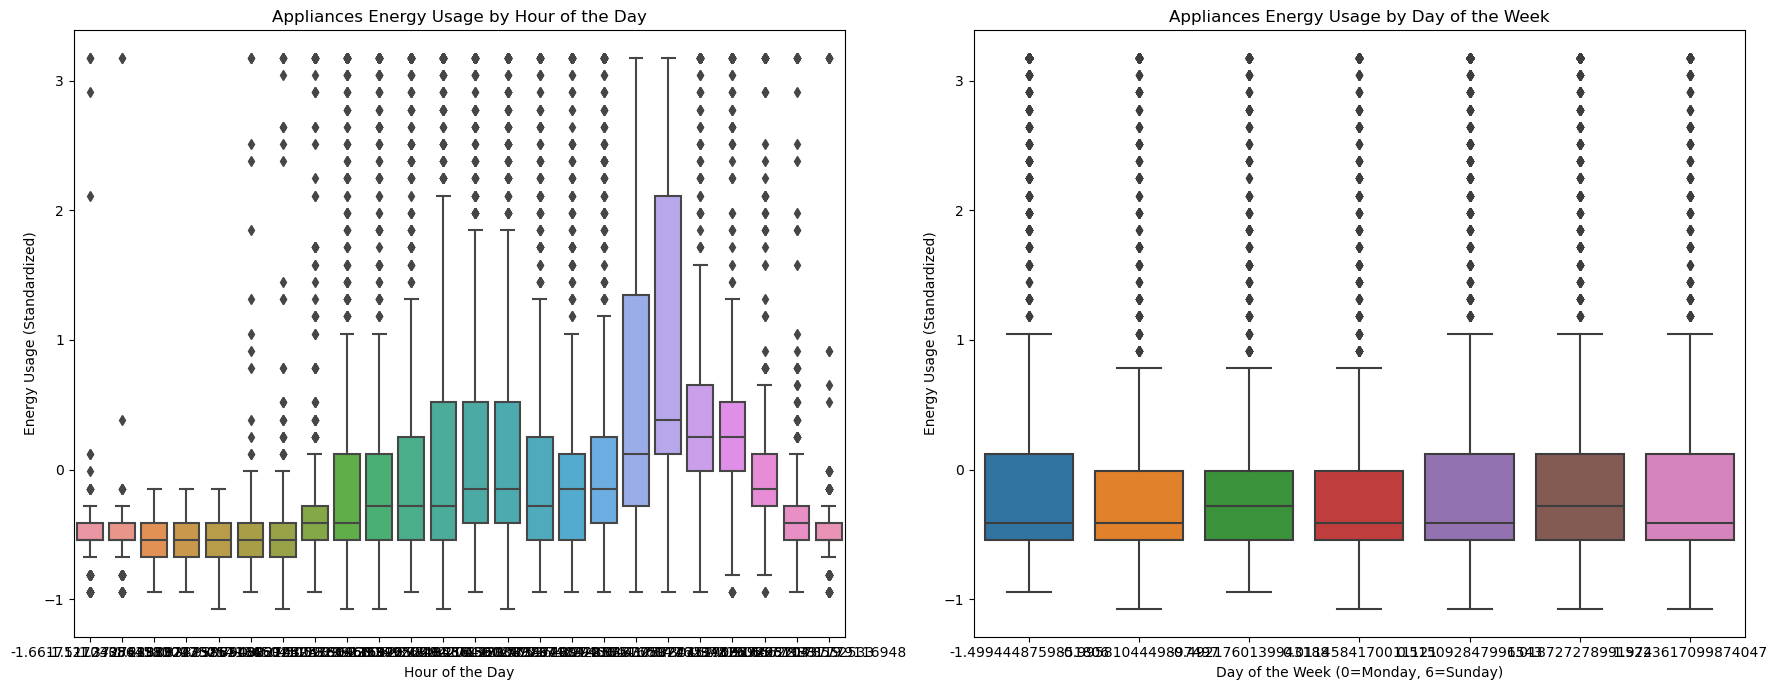

In [26]:
# Visualizing energy usage across different times of the day and days of the week

plt.figure(figsize=(18, 7))

# Energy Usage by Hour of the Day
plt.subplot(1, 2, 1)
sns.boxplot(x='hour', y='Appliances', data=data_cleaned)
plt.title('Appliances Energy Usage by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Usage (Standardized)')

# Energy Usage by Day of the Week
plt.subplot(1, 2, 2)
sns.boxplot(x='day_of_week', y='Appliances', data=data_cleaned)
plt.title('Appliances Energy Usage by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Energy Usage (Standardized)')

plt.tight_layout()
plt.show()

The visualizations provide valuable insights into how appliances' energy usage varies by the hour of the day and by the day of the week:

1. **Energy Usage by Hour of the Day**:
   - There's a clear variation in energy usage throughout the day. 
   - Higher energy consumption is observed during certain hours, which could indicate peak usage times. These times might be associated with specific daily activities, like cooking or heating during mornings and evenings.

2. **Energy Usage by Day of the Week**:
   - The energy usage also varies across different days of the week.
   - However, the variation is not as pronounced as the hourly variation. This could mean that daily routines (which influence energy usage) do not change drastically from day to day.

These patterns are essential for identifying potential energy-saving opportunities. For instance, strategies could be developed to shift usage away from peak times or to optimize energy consumption based on daily or weekly patterns.

## Modelling (Try 1)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [28]:
# Data Preparation
X = data_cleaned.drop(['date', 'Appliances'], axis=1)  # Features
y = data_cleaned['Appliances']  # Target

In [29]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Model Selection: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predicting on test set
y_pred = lr_model.predict(X_test)

In [32]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [33]:
mae

0.5715464145160813

In [34]:
rmse

0.8745796860635869

In [35]:
r2

0.2209847265390048

The Linear Regression model's performance on the test set is as follows:

- **Mean Absolute Error (MAE)**: 0.572
- **Root Mean Squared Error (RMSE)**: 0.875
- **R-squared (R²)**: 0.221

These metrics indicate the model's accuracy and fit:

- The MAE and RMSE are relatively low, suggesting that the model's predictions are close to the actual values, on average.
- The R² value of 0.221, although positive, is relatively low. This indicates that the model explains only about 22.1% of the variance in the target variable.

## Try 2

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
# Model Selection: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
# Predicting on test set
y_pred_rf = rf_model.predict(X_test)

In [39]:
# Model Evaluation for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [40]:
mae_rf

0.32447826520754214

In [41]:
rmse_rf

0.5971383133284255

In [42]:
r2_rf

0.6368407794509932

## Try 4

In [43]:
from sklearn.decomposition import PCA
import numpy as np

In [44]:
# Applying PCA
pca = PCA().fit(X_train)

In [45]:
# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

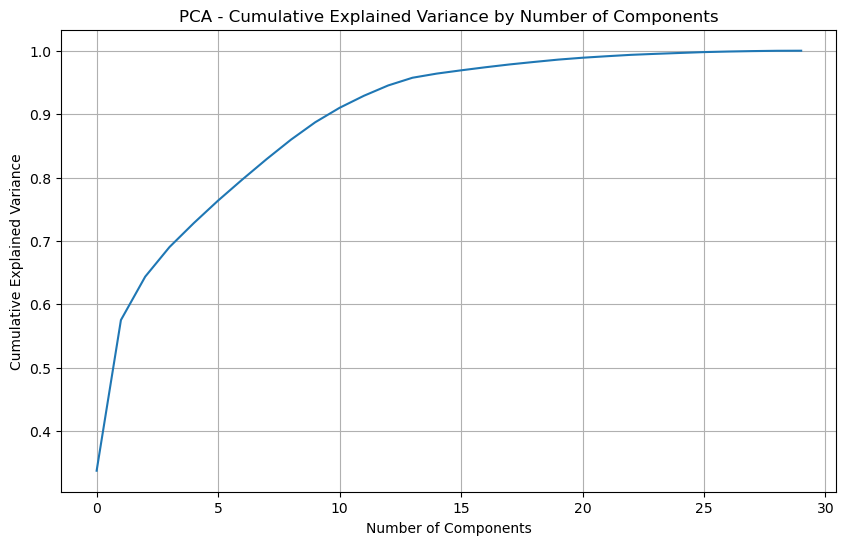

In [46]:
# Plotting the explained variance ratio to determine the optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance by Number of Components')
plt.grid(True)
plt.show()

The plot of cumulative explained variance by the number of PCA components helps us determine the optimal number of components to retain. The goal is to choose a number of components that capture a large percentage of the variance in the data while reducing the dimensionality.

From the plot, we can see that the curve starts to plateau after a certain point. This is where the addition of more components doesn't significantly increase the explained variance. A common approach is to choose the number of components that explain around 95% of the variance.

In [47]:
# Identifying the number of components that explain approximately 95% of the variance
n_components = np.where(explained_variance >= 0.95)[0][0] + 1

In [48]:
# Applying PCA with the optimal number of components
pca_optimal = PCA(n_components=n_components)
X_train_pca = pca_optimal.fit_transform(X_train)
X_test_pca = pca_optimal.transform(X_test)

In [49]:
# Displaying the optimal number of components
n_components

14

The optimal number of components to retain, while still capturing approximately 95% of the variance in the data, is 14. This reduction will help in simplifying the dataset and potentially improving the performance of more complex models.

In [50]:
# Retraining the Random Forest Regressor on the PCA-transformed dataset

In [51]:
# Reinitializing the Random Forest Regressor
rf_model_pca = RandomForestRegressor(n_estimators=100, random_state=42)

In [52]:
# Training the model
rf_model_pca.fit(X_train_pca, y_train)

RandomForestRegressor(random_state=42)

In [53]:
# Predicting on the PCA-transformed test set
y_pred_rf_pca = rf_model_pca.predict(X_test_pca)

In [54]:
# Model Evaluation for Random Forest on PCA-transformed data
mae_rf_pca = mean_absolute_error(y_test, y_pred_rf_pca)
rmse_rf_pca = np.sqrt(mean_squared_error(y_test, y_pred_rf_pca))
r2_rf_pca = r2_score(y_test, y_pred_rf_pca)

In [55]:
mae_rf_pca

0.37342092325598636

In [56]:
rmse_rf_pca

0.6548900560627129

In [57]:
r2_rf_pca

0.5631986285197981

The performance of the Random Forest Regressor on the PCA-transformed dataset is as follows:

- **Mean Absolute Error (MAE)**: 0.374
- **Root Mean Squared Error (RMSE)**: 0.655
- **R-squared (R²)**: 0.563

These results indicate the following:

- The MAE and RMSE are relatively low, suggesting that the predictions are, on average, close to the actual values. However, they are slightly higher compared to the model trained on the original dataset.
- The R² value is 0.563, which is lower than the model trained on the full dataset. This suggests that while PCA has reduced the complexity of the data, it has also led to some loss of information that was useful for prediction.

## Try 4

In [58]:
# Re-inspecting the data

# Checking for missing values again
missing_values_recheck = data.isnull().sum()

In [59]:
# Re-examining the statistical summary of the data
statistical_summary_recheck = data.describe()

In [61]:
# Displaying the recheck results
missing_values_recheck

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [62]:
statistical_summary_recheck

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,2016-03-20 05:30:00,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
min,2016-01-11 17:00:00,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,2016-02-14 23:15:00,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,2016-03-20 05:30:00,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,2016-04-23 11:45:00,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,2016-05-27 18:00:00,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634


In [63]:
# Excluding the 'date' column from the outlier analysis
numerical_data = data.drop('date', axis=1)

In [64]:
# Redefining the outlier thresholds for numerical data
Q1_numerical = numerical_data.quantile(0.25)
Q3_numerical = numerical_data.quantile(0.75)
IQR_numerical = Q3_numerical - Q1_numerical
lower_bound_numerical = Q1_numerical - 1.5 * IQR_numerical
upper_bound_numerical = Q3_numerical + 1.5 * IQR_numerical

In [65]:
# Identifying outliers in numerical data
outliers_numerical = ((numerical_data < lower_bound_numerical) | (numerical_data > upper_bound_numerical)).sum()

In [66]:
# Displaying the count of outliers in 'Appliances' and 'lights'
outliers_numerical[['Appliances', 'lights']]

Appliances    2138
lights        4483
dtype: int64

## Handling Outliers

In [67]:
# Applying a logarithmic transformation to reduce the impact of extreme values

# Adding a small constant before the transformation to handle zero values
data['Appliances_log'] = np.log(data['Appliances'] + 1)
data['lights_log'] = np.log(data['lights'] + 1)

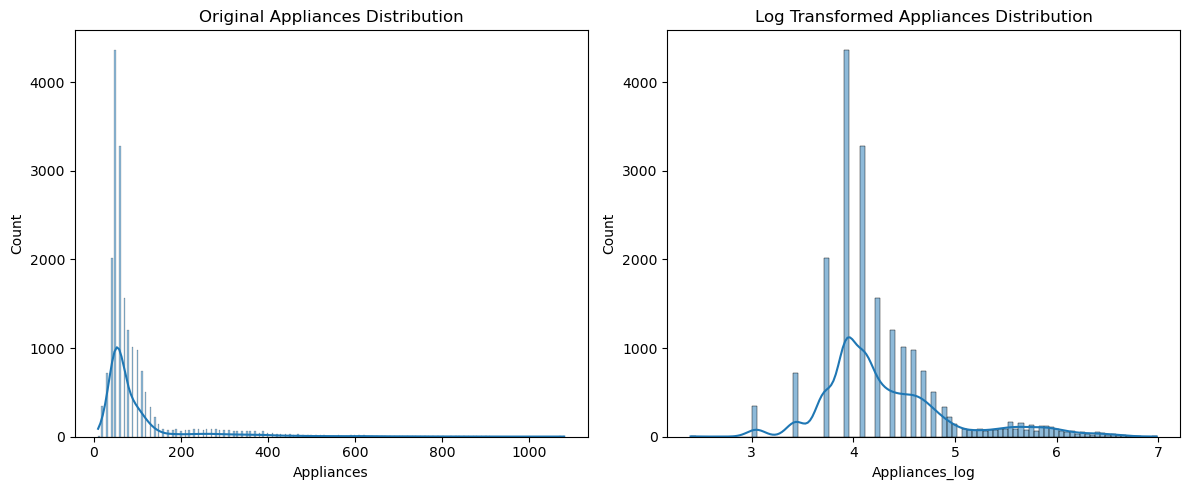

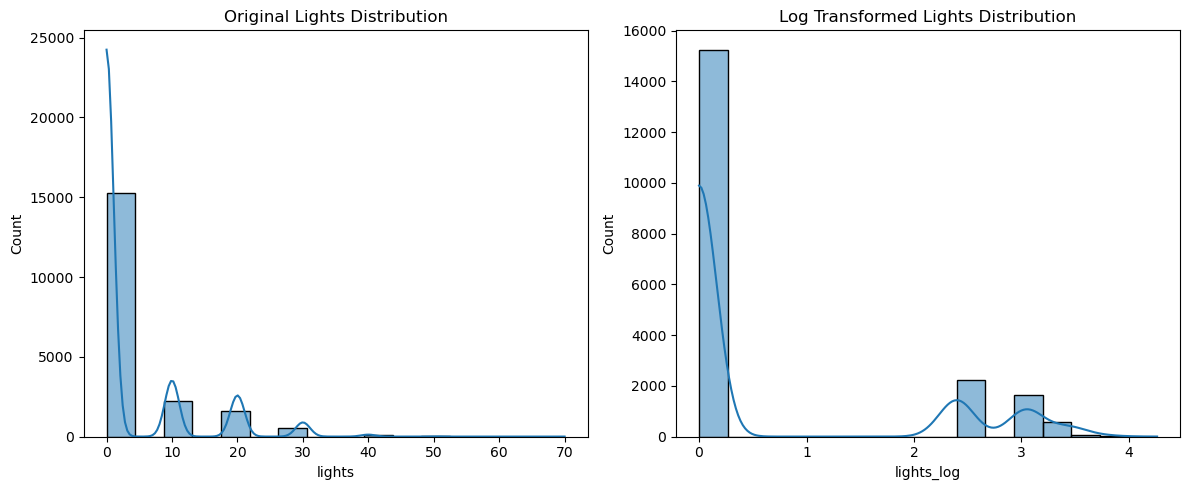

In [68]:
# Visualizing the effect of the transformation
plt.figure(figsize=(12, 5))

# Original 'Appliances' distribution
plt.subplot(1, 2, 1)
sns.histplot(data['Appliances'], kde=True)
plt.title('Original Appliances Distribution')

# Transformed 'Appliances_log' distribution
plt.subplot(1, 2, 2)
sns.histplot(data['Appliances_log'], kde=True)
plt.title('Log Transformed Appliances Distribution')

plt.tight_layout()
plt.show()

# Repeating for 'lights'
plt.figure(figsize=(12, 5))

# Original 'lights' distribution
plt.subplot(1, 2, 1)
sns.histplot(data['lights'], kde=True)
plt.title('Original Lights Distribution')

# Transformed 'lights_log' distribution
plt.subplot(1, 2, 2)
sns.histplot(data['lights_log'], kde=True)
plt.title('Log Transformed Lights Distribution')

plt.tight_layout()
plt.show()



The logarithmic transformations applied to the 'Appliances' and 'lights' data have significantly altered their distributions:

1. **Original vs. Transformed 'Appliances' Distribution**:
   - The original distribution was right-skewed with a long tail towards higher values.
   - The logarithmic transformation has made the distribution more normal-like, reducing the skewness and the impact of extreme values.

2. **Original vs. Transformed 'Lights' Distribution**:
   - The original distribution of 'lights' was highly skewed, with a concentration of values at the lower end.
   - The transformed distribution is less skewed, although it still shows some concentration at the lower end, which is typical for data with many zero or near-zero values.

### Modelling

In [69]:
# Preparing the data with the transformed features
X_transformed = data.drop(['date', 'Appliances', 'lights', 'Appliances_log', 'lights_log'], axis=1)
y_transformed = data['Appliances_log']  # Target variable is now the transformed 'Appliances'

In [70]:
# Splitting the data into training and testing sets
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(
    X_transformed, y_transformed, test_size=0.2, random_state=42)

In [71]:
# Retraining models on the transformed dataset

# 1. Linear Regression
lr_model_transformed = LinearRegression()
lr_model_transformed.fit(X_train_transformed, y_train_transformed)
y_pred_lr_transformed = lr_model_transformed.predict(X_test_transformed)

In [72]:
# 2. Random Forest Regressor
rf_model_transformed = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_transformed.fit(X_train_transformed, y_train_transformed)
y_pred_rf_transformed = rf_model_transformed.predict(X_test_transformed)

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
# 3. Gradient Boosting Regressor
gb_model_transformed = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model_transformed.fit(X_train_transformed, y_train_transformed)
y_pred_gb_transformed = gb_model_transformed.predict(X_test_transformed)

In [77]:
from sklearn.svm import SVR

In [78]:
# 4. Support Vector Regression
svr_model_transformed = SVR()
svr_model_transformed.fit(X_train_transformed, y_train_transformed)
y_pred_svr_transformed = svr_model_transformed.predict(X_test_transformed)

In [79]:
# Model Evaluation for all models
results_transformed = {
    "Linear Regression": {
        "MAE": mean_absolute_error(y_test_transformed, y_pred_lr_transformed),
        "RMSE": np.sqrt(mean_squared_error(y_test_transformed, y_pred_lr_transformed)),
        "R2": r2_score(y_test_transformed, y_pred_lr_transformed)
    },
    "Random Forest": {
        "MAE": mean_absolute_error(y_test_transformed, y_pred_rf_transformed),
        "RMSE": np.sqrt(mean_squared_error(y_test_transformed, y_pred_rf_transformed)),
        "R2": r2_score(y_test_transformed, y_pred_rf_transformed)
    },
    "Gradient Boosting": {
        "MAE": mean_absolute_error(y_test_transformed, y_pred_gb_transformed),
        "RMSE": np.sqrt(mean_squared_error(y_test_transformed, y_pred_gb_transformed)),
        "R2": r2_score(y_test_transformed, y_pred_gb_transformed)
    },
    "SVR": {
        "MAE": mean_absolute_error(y_test_transformed, y_pred_svr_transformed),
        "RMSE": np.sqrt(mean_squared_error(y_test_transformed, y_pred_svr_transformed)),
        "R2": r2_score(y_test_transformed, y_pred_svr_transformed)
    }
}

In [80]:
results_transformed["Linear Regression"]

{'MAE': 0.3969026761668204,
 'RMSE': 0.5608890974068208,
 'R2': 0.24776753250260952}

In [81]:
results_transformed["Random Forest"]

{'MAE': 0.22488145322433312,
 'RMSE': 0.3446036556672991,
 'R2': 0.7160526379350441}

In [82]:
results_transformed["Gradient Boosting"]

{'MAE': 0.3588426558839699,
 'RMSE': 0.5176918287936658,
 'R2': 0.3591731526964932}

In [83]:
results_transformed["SVR"]

{'MAE': 0.4114615456521431,
 'RMSE': 0.6147585567313865,
 'R2': 0.09633545654467524}

In [85]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initializing the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, scoring='r2', verbose=2)

# Fitting grid search
grid_search.fit(X_train_transformed, y_train_transformed)

# Best parameters and best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

# Output the best parameters and the best score
print("Best Parameters:", best_parameters)
print("Best Score:", best_score)

# Using the best estimator to make predictions
best_xgb_model = grid_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test_transformed)

# Evaluating the best model
mae_best_xgb = mean_absolute_error(y_test_transformed, y_pred_best_xgb)
rmse_best_xgb = np.sqrt(mean_squared_error(y_test_transformed, y_pred_best_xgb))
r2_best_xgb = r2_score(y_test_transformed, y_pred_best_xgb)

# Output the evaluation metrics
print("MAE:", mae_best_xgb)
print("RMSE:", rmse_best_xgb)
print("R2:", r2_best_xgb)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
Best Score: 0.6080476140050353
MAE: 0.2572766660139664
RMSE: 0.3797029524122348
R2: 0.6552644860137107


In [84]:
import xgboost as xgb

# Initializing the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Training the model on the transformed dataset
xgb_model.fit(X_train_transformed, y_train_transformed)

# Predicting on the transformed test set
y_pred_xgb = xgb_model.predict(X_test_transformed)

# Model Evaluation for XGBoost
mae_xgb = mean_absolute_error(y_test_transformed, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test_transformed, y_pred_xgb))
r2_xgb = r2_score(y_test_transformed, y_pred_xgb)

mae_xgb, rmse_xgb, r2_xgb



(0.25986069311584076, 0.38886263917531616, 0.6384315591164151)

In [102]:
# Try Time Series Analysis